## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.376030  1.147851  1.475242  1.086598 -1.142691  1.331473
1  1.174950  0.425040 -1.347251  0.300914  1.277835  1.673779
2  0.338297  1.184875  0.878778 -0.250364  0.936757  0.878100
3 -1.062285  0.491859 -0.249314 -0.480740 -0.796400 -0.918390
4  1.609570  0.795110  0.963456 -1.381562  0.571055 -0.256569


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9807592	total: 68.8ms	remaining: 1m 8s
1:	learn: 0.9715478	total: 69.4ms	remaining: 34.6s
2:	learn: 0.9616990	total: 70ms	remaining: 23.2s
3:	learn: 0.9509855	total: 70.5ms	remaining: 17.5s
4:	learn: 0.9422333	total: 71.1ms	remaining: 14.1s
5:	learn: 0.9333582	total: 71.7ms	remaining: 11.9s
6:	learn: 0.9208657	total: 72.2ms	remaining: 10.2s
7:	learn: 0.9107987	total: 72.7ms	remaining: 9.01s
8:	learn: 0.9018527	total: 73.2ms	remaining: 8.06s
9:	learn: 0.8928075	total: 73.7ms	remaining: 7.29s
10:	learn: 0.8848382	total: 74.1ms	remaining: 6.66s
11:	learn: 0.8735488	total: 74.7ms	remaining: 6.15s
12:	learn: 0.8644730	total: 75.4ms	remaining: 5.72s
13:	learn: 0.8546255	total: 76ms	remaining: 5.35s
14:	learn: 0.8476000	total: 76.4ms	remaining: 5.01s
15:	learn: 0.8394734	total: 76.9ms	remaining: 4.73s
16:	learn: 0.8315915	total: 77.4ms	remaining: 4.47s
17:	learn: 0.8233499	total: 77.8ms	remaining: 4.25s
18:	learn: 0.8159520	total: 78.3ms	remaining: 4.

85:	learn: 0.4509613	total: 109ms	remaining: 1.16s
86:	learn: 0.4478054	total: 110ms	remaining: 1.15s
87:	learn: 0.4441804	total: 110ms	remaining: 1.14s
88:	learn: 0.4404202	total: 111ms	remaining: 1.13s
89:	learn: 0.4370531	total: 111ms	remaining: 1.13s
90:	learn: 0.4332172	total: 112ms	remaining: 1.12s
91:	learn: 0.4296405	total: 113ms	remaining: 1.11s
92:	learn: 0.4261426	total: 113ms	remaining: 1.1s
93:	learn: 0.4227785	total: 114ms	remaining: 1.09s
94:	learn: 0.4196315	total: 114ms	remaining: 1.08s
95:	learn: 0.4162678	total: 114ms	remaining: 1.08s
96:	learn: 0.4127622	total: 115ms	remaining: 1.07s
97:	learn: 0.4093093	total: 115ms	remaining: 1.06s
98:	learn: 0.4059205	total: 116ms	remaining: 1.05s
99:	learn: 0.4027774	total: 116ms	remaining: 1.05s
100:	learn: 0.4001618	total: 117ms	remaining: 1.04s
101:	learn: 0.3970951	total: 117ms	remaining: 1.03s
102:	learn: 0.3940424	total: 118ms	remaining: 1.02s
103:	learn: 0.3907811	total: 118ms	remaining: 1.02s
104:	learn: 0.3880252	total:

242:	learn: 0.1431807	total: 187ms	remaining: 584ms
243:	learn: 0.1423675	total: 188ms	remaining: 583ms
244:	learn: 0.1416160	total: 189ms	remaining: 581ms
245:	learn: 0.1403360	total: 189ms	remaining: 579ms
246:	learn: 0.1394123	total: 189ms	remaining: 578ms
247:	learn: 0.1384545	total: 190ms	remaining: 576ms
248:	learn: 0.1375907	total: 190ms	remaining: 574ms
249:	learn: 0.1367839	total: 191ms	remaining: 572ms
250:	learn: 0.1358521	total: 191ms	remaining: 571ms
251:	learn: 0.1348564	total: 192ms	remaining: 569ms
252:	learn: 0.1336868	total: 192ms	remaining: 567ms
253:	learn: 0.1328977	total: 193ms	remaining: 566ms
254:	learn: 0.1317657	total: 193ms	remaining: 564ms
255:	learn: 0.1308782	total: 194ms	remaining: 563ms
256:	learn: 0.1297765	total: 194ms	remaining: 562ms
257:	learn: 0.1290227	total: 195ms	remaining: 560ms
258:	learn: 0.1279612	total: 195ms	remaining: 559ms
259:	learn: 0.1272087	total: 196ms	remaining: 558ms
260:	learn: 0.1264358	total: 196ms	remaining: 556ms
261:	learn: 

460:	learn: 0.0423229	total: 293ms	remaining: 343ms
461:	learn: 0.0422024	total: 294ms	remaining: 342ms
462:	learn: 0.0420205	total: 294ms	remaining: 341ms
463:	learn: 0.0418245	total: 295ms	remaining: 341ms
464:	learn: 0.0416469	total: 295ms	remaining: 340ms
465:	learn: 0.0415296	total: 296ms	remaining: 339ms
466:	learn: 0.0413757	total: 296ms	remaining: 338ms
467:	learn: 0.0411906	total: 297ms	remaining: 337ms
468:	learn: 0.0409741	total: 297ms	remaining: 336ms
469:	learn: 0.0407926	total: 298ms	remaining: 336ms
470:	learn: 0.0407302	total: 298ms	remaining: 335ms
471:	learn: 0.0405194	total: 298ms	remaining: 334ms
472:	learn: 0.0404585	total: 299ms	remaining: 333ms
473:	learn: 0.0403998	total: 299ms	remaining: 332ms
474:	learn: 0.0402341	total: 300ms	remaining: 331ms
475:	learn: 0.0401751	total: 300ms	remaining: 330ms
476:	learn: 0.0401169	total: 300ms	remaining: 329ms
477:	learn: 0.0400597	total: 302ms	remaining: 329ms
478:	learn: 0.0400044	total: 302ms	remaining: 329ms
479:	learn: 

628:	learn: 0.0254208	total: 371ms	remaining: 219ms
629:	learn: 0.0253189	total: 372ms	remaining: 218ms
630:	learn: 0.0251388	total: 372ms	remaining: 217ms
631:	learn: 0.0250224	total: 372ms	remaining: 217ms
632:	learn: 0.0249087	total: 373ms	remaining: 216ms
633:	learn: 0.0247908	total: 373ms	remaining: 215ms
634:	learn: 0.0246892	total: 374ms	remaining: 215ms
635:	learn: 0.0245783	total: 374ms	remaining: 214ms
636:	learn: 0.0244119	total: 375ms	remaining: 214ms
637:	learn: 0.0243035	total: 375ms	remaining: 213ms
638:	learn: 0.0242482	total: 376ms	remaining: 212ms
639:	learn: 0.0241408	total: 376ms	remaining: 212ms
640:	learn: 0.0239715	total: 377ms	remaining: 211ms
641:	learn: 0.0239177	total: 377ms	remaining: 210ms
642:	learn: 0.0237951	total: 378ms	remaining: 210ms
643:	learn: 0.0237274	total: 378ms	remaining: 209ms
644:	learn: 0.0235745	total: 379ms	remaining: 208ms
645:	learn: 0.0235230	total: 379ms	remaining: 208ms
646:	learn: 0.0234191	total: 380ms	remaining: 207ms
647:	learn: 

847:	learn: 0.0106483	total: 476ms	remaining: 85.4ms
848:	learn: 0.0106158	total: 477ms	remaining: 84.8ms
849:	learn: 0.0105553	total: 477ms	remaining: 84.2ms
850:	learn: 0.0105495	total: 478ms	remaining: 83.6ms
851:	learn: 0.0105439	total: 478ms	remaining: 83ms
852:	learn: 0.0105148	total: 479ms	remaining: 82.5ms
853:	learn: 0.0104829	total: 479ms	remaining: 81.9ms
854:	learn: 0.0104458	total: 479ms	remaining: 81.3ms
855:	learn: 0.0104145	total: 480ms	remaining: 80.7ms
856:	learn: 0.0103696	total: 480ms	remaining: 80.1ms
857:	learn: 0.0103641	total: 481ms	remaining: 79.6ms
858:	learn: 0.0103586	total: 481ms	remaining: 79ms
859:	learn: 0.0103225	total: 481ms	remaining: 78.4ms
860:	learn: 0.0102920	total: 482ms	remaining: 77.8ms
861:	learn: 0.0102637	total: 482ms	remaining: 77.2ms
862:	learn: 0.0102279	total: 483ms	remaining: 76.6ms
863:	learn: 0.0101978	total: 483ms	remaining: 76ms
864:	learn: 0.0101406	total: 483ms	remaining: 75.4ms
865:	learn: 0.0101353	total: 484ms	remaining: 74.9ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

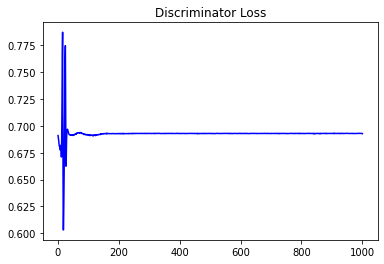

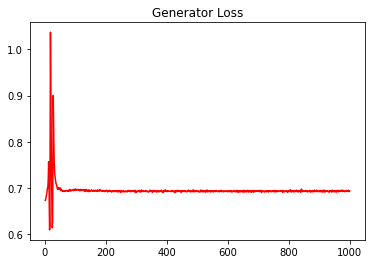

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.06116182809299114


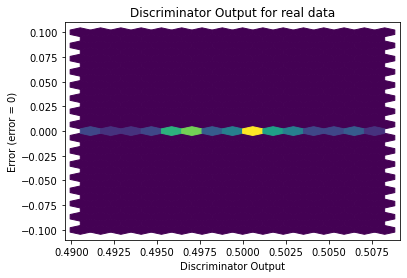

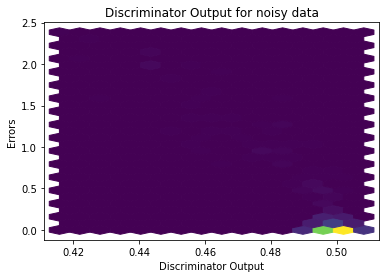

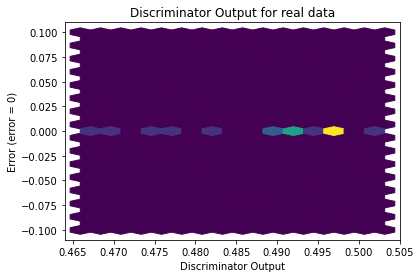

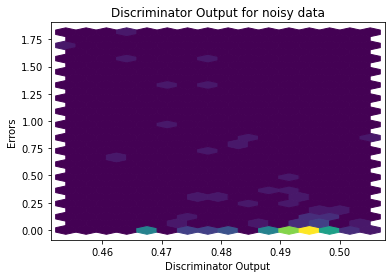

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


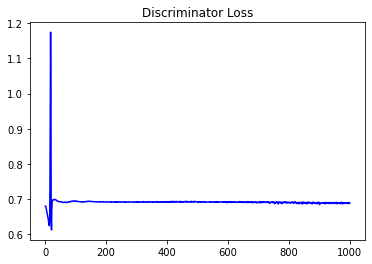

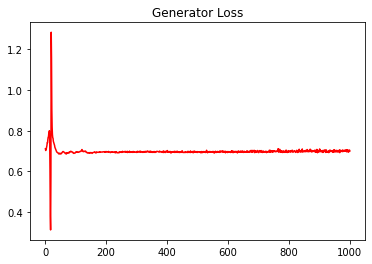

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09655784513694994


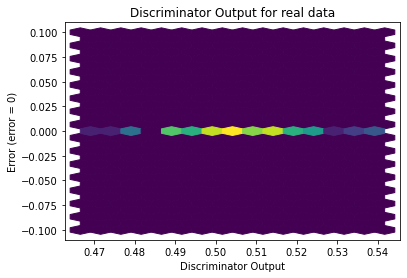

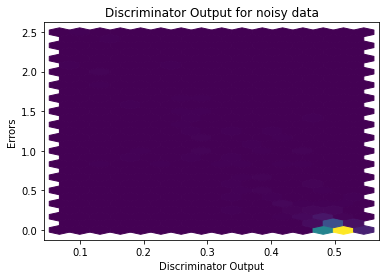

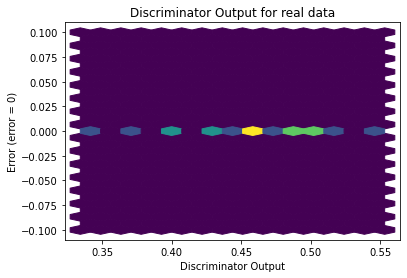

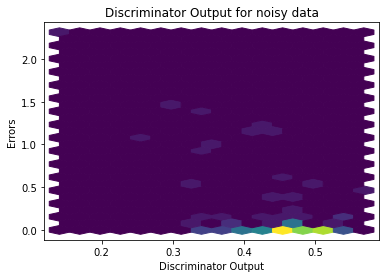

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0929]], requires_grad=True)
